## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Clara
- Apellido: Schiebelbein
- Legajo: 1526005

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [2]:
## Importo librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from seaborn import load_dataset

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [3]:
#importamos el dataset
diabetes = pd.read_csv("ClusterAI_TP_dataset_diabetes.csv")

In [4]:
#Vemos que se haya importado correctamente
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [6]:
#Vemos las dimensiones del dataset. 9 columnas y 768 filas
diabetes.shape

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [7]:
# Con el siguiente comando podemos ver el tipo de dato para cada una de las variables.
# Además nos indica si contienen nulos o no.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [9]:
# Podemos ver la distribución de la variable 
diabetes['Outcome'].value_counts(normalize=True,dropna=False)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [10]:
# Con este comando obtenemos algunas estadísticas descriptivas de los datos
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

Text(0.5, 1.03, 'Pairplot 1')

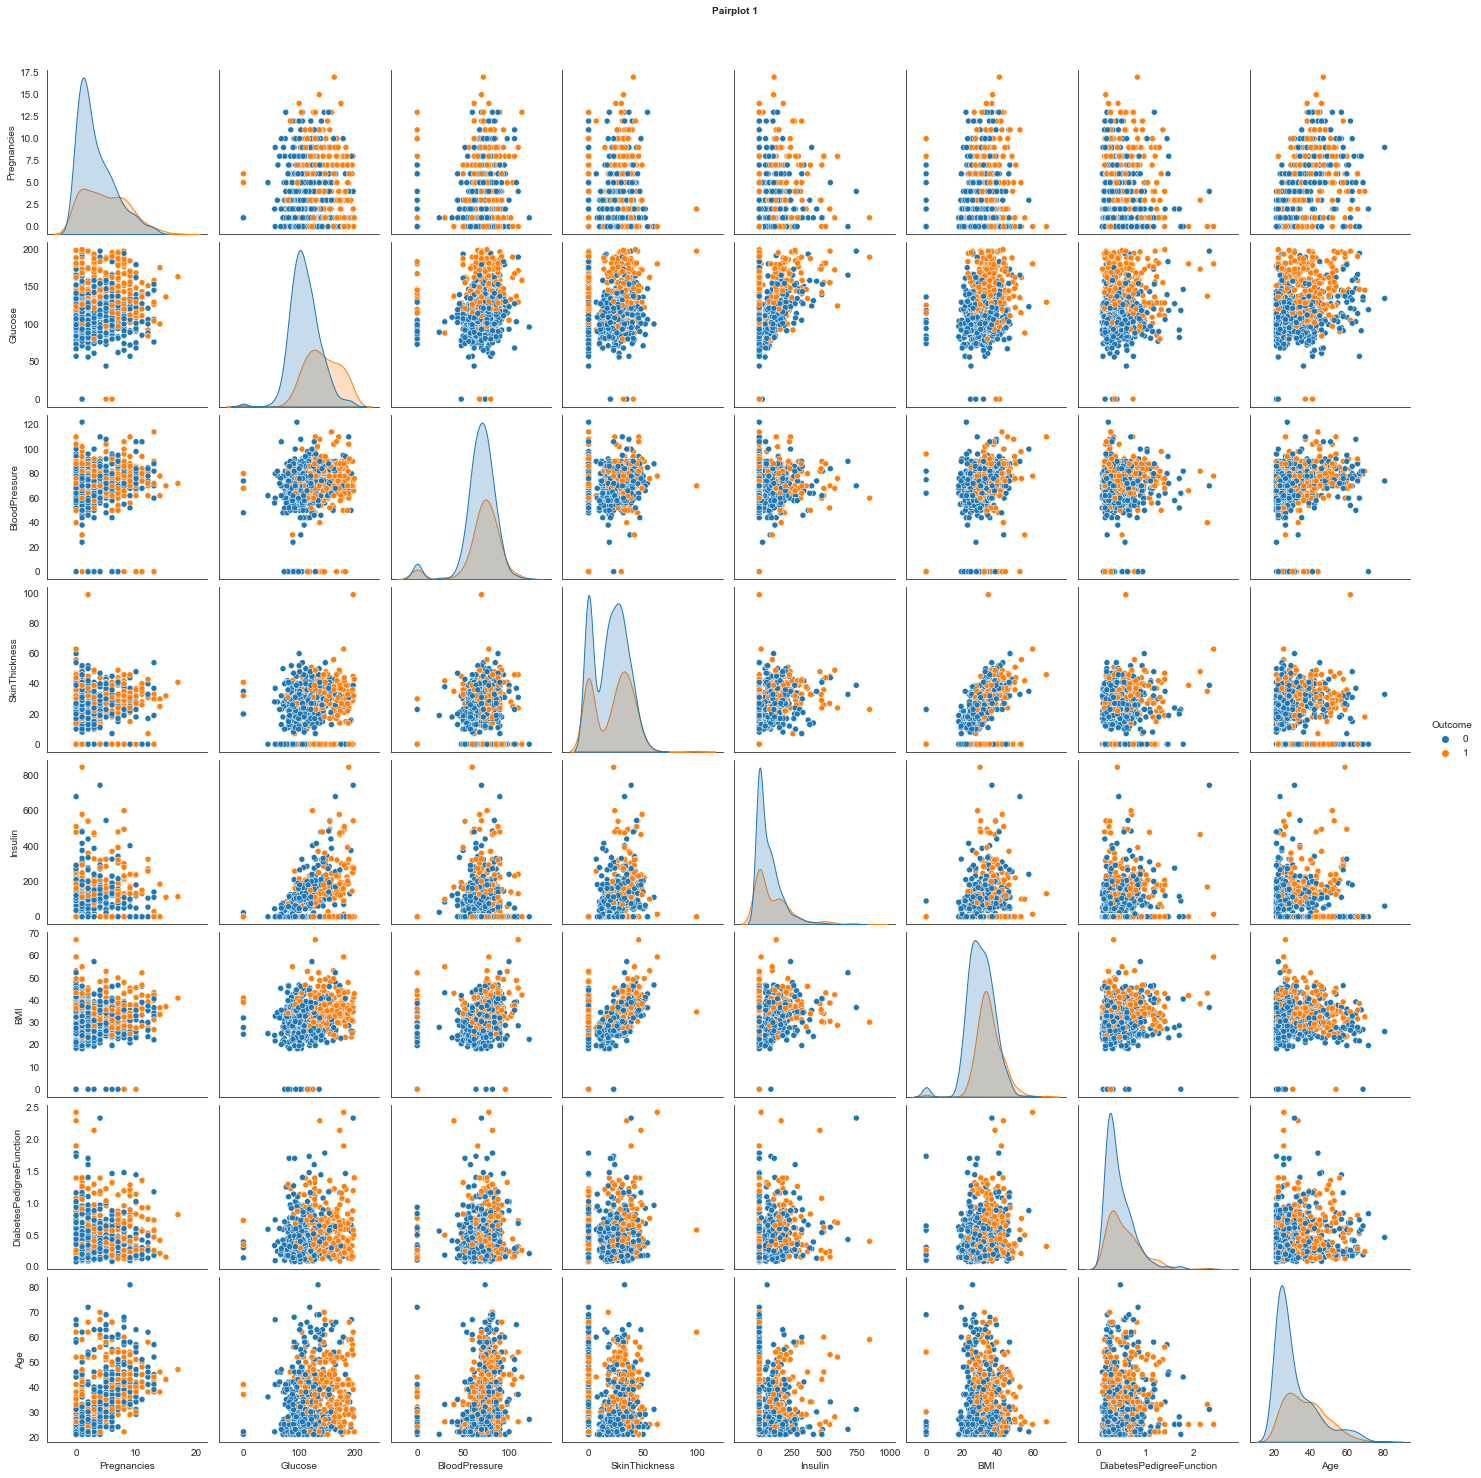

In [11]:

# Seteo de Tema
sns.set_style('white')
vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin',
        'BMI', 'DiabetesPedigreeFunction','Age']

# Creo el pairplot
pairplot = sns.pairplot(diabetes, hue = 'Outcome', vars = vars)

# Titulos
pairplot.fig.suptitle('Pairplot 1', fontweight = 'heavy', y = 1.03, fontsize = '10', 
                      fontfamily = 'sans-serif')

In [ ]:
#podemos observar que muchas de las variables pueden ser limpiadas para obtener una mejor definicion en los graficos.


##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

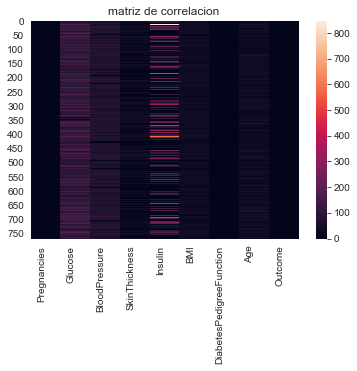

In [12]:
corr_c_plot = sns.heatmap(diabetes, xticklabels=1, yticklabels=50)
corr_c_plot.set_xticklabels(corr_c_plot.get_xticklabels(), rotation=90, ha="right")
plt.title("matriz de correlacion ")
plt.show()


In [13]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


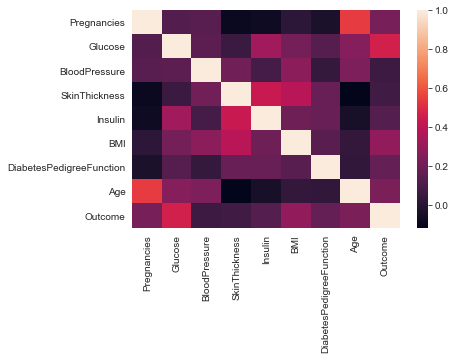

In [20]:

sns.heatmap(diabetes.corr())
plt.show()

In [ ]:
#se puede observar que la correlacion entre variables es baja.
#los pares de variables mas correlacionadas son: Age-Pregnacies(0.54),glucosa-outcome (0.466)
#las variables estan en diferentes escalas, deberiamos cambiar esas escalas

##### **Objetivo 8**
Hacer un histograma de la variable BMI

Text(0.5, 1.0, 'BMI')

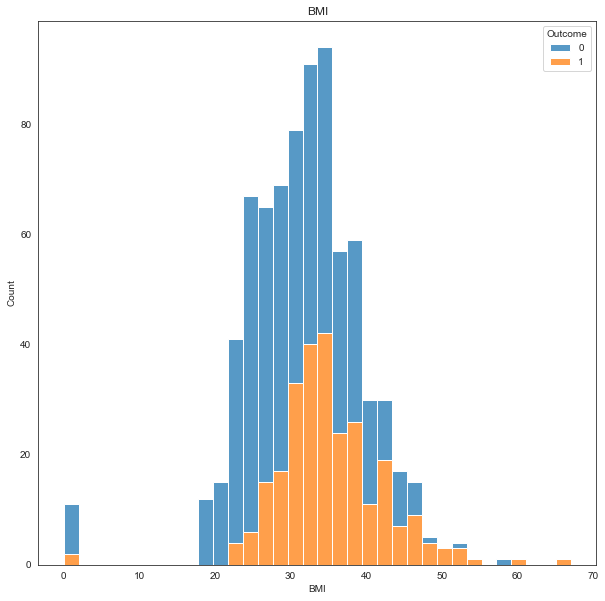

In [15]:
# Veamos la distribucion 
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=diabetes, x='BMI', hue='Outcome', stat='count', edgecolor=None,multiple="stack")
ax.set_title('BMI')

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

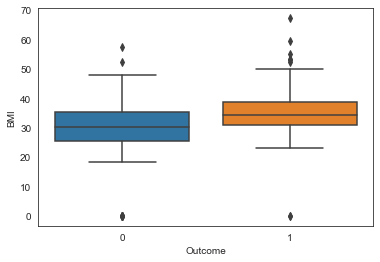

In [17]:
# Podemos ver la distribucion individuald de cada variable 
sns.boxplot(x="Outcome", y="BMI", data=diabetes)

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [18]:
#elimino las filas con BMI= o 
diabetes1 = diabetes.drop(diabetes[diabetes['BMI']==0].index)

In [19]:
# dataframe diabetes 
diabetes.shape


(768, 9)

In [20]:
# nuevo dataframe, se eliminaron 11 registros 
diabetes1.shape

(757, 9)

Text(0.5, 1.0, 'BMI')

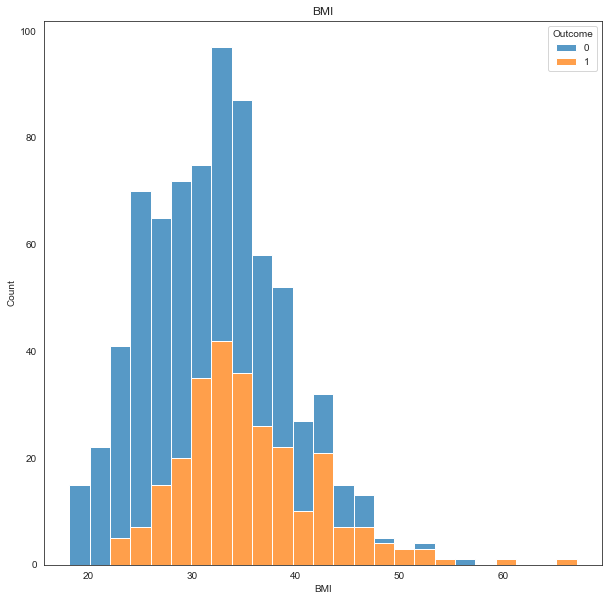

In [21]:
# Veamos la distribucion 
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=diabetes1, x='BMI', hue='Outcome', stat='count', edgecolor=None,multiple="stack")
ax.set_title('BMI')

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

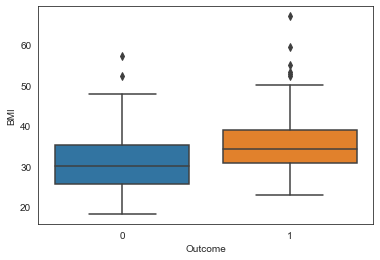

In [22]:
sns.boxplot(x="Outcome", y="BMI", data=diabetes1)

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

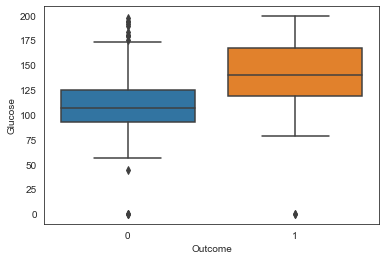

In [23]:
sns.boxplot(x="Outcome", y="Glucose", data=diabetes1)

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

/Users/claraschiebelbein/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


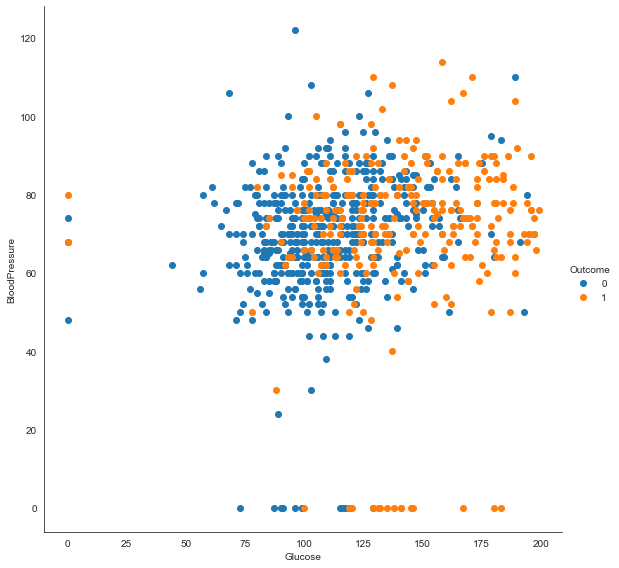

In [24]:

sns.FacetGrid(diabetes1, hue="Outcome", size=8) \
   .map(plt.scatter, "Glucose", "BloodPressure") \
   .add_legend()

In [ ]:
#se puede observar que a valores altos de glucosa, mas probabilidad tiene de ser diabetico

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [25]:
#creo una nueva columna
diabetes1.insert(8,"RangeAge", True )
diabetes1.loc[ diabetes1['Age'] <30, 'RangeAge'] = 'Primer'
diabetes1.loc[(diabetes1['Age'] >= 30) & (diabetes1['Age'] < 40), 'RangeAge'] = 'Segunda'
diabetes1.loc[ diabetes1['Age'] >=40, 'RangeAge'] = 'Tercer'



In [26]:
diabetes1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,RangeAge,Outcome
0,6,148,72,35,0,33.6,0.627,50,Tercer,1
1,1,85,66,29,0,26.6,0.351,31,Segunda,0
2,8,183,64,0,0,23.3,0.672,32,Segunda,1
3,1,89,66,23,94,28.1,0.167,21,Primer,0
4,0,137,40,35,168,43.1,2.288,33,Segunda,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,Tercer,0
764,2,122,70,27,0,36.8,0.340,27,Primer,0
765,5,121,72,23,112,26.2,0.245,30,Segunda,0
766,1,126,60,0,0,30.1,0.349,47,Tercer,1


# **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

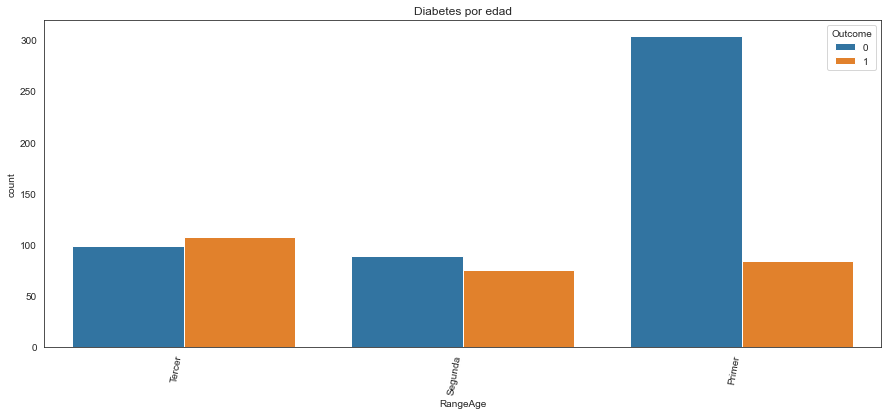

RangeAge  Outcome
Primer    0          304
          1           84
Segunda   0           89
          1           75
Tercer    0           98
          1          107
dtype: int64

In [40]:
plt.figure (figsize=(15,6))
ax = sns.countplot(x="RangeAge", hue="Outcome", data=diabetes1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")

plt.title("Diabetes por edad")
plt.show()

diabetes1.groupby(['RangeAge','Outcome']).size()

In [ ]:
# se puede observar que no influye el rango etario(segundo y tercero)
# en la cantidad de pacientes con diabetes y no diabeticos. 
# en cambio en el primer rango etario se puede observar una menor cantidad de pacientes con diabetes.
